## Download MNIST

In [ ]:
!pip install -q torchvision matplotlib tqdm

In [ ]:
from torchvision import datasets
import torchvision.transforms as T
import torch

transform = T.Compose([
    T.ToTensor(),
    T.Lambda(lambda x: torch.flatten(x)),
])
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=False, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16622558.33it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 431207.57it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1597425.65it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4549923.28it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



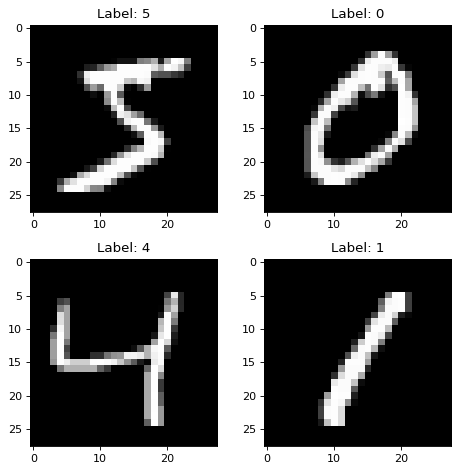

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[6, 6], dpi=80)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % train_dataset[i][1])
    plt.imshow(train_dataset[i][0].numpy().reshape([28, 28]), cmap='gray');
fig.tight_layout()

## Feed-forward net

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

embedding_size = train_dataset[0][0].shape[0]

class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(embedding_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
model = Net()
print(model)
list(model.parameters())

Net(
  (fc1): Linear(in_features=784, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=10, bias=True)
)


[Parameter containing:
 tensor([[ 0.0306, -0.0200, -0.0207,  ..., -0.0272, -0.0297, -0.0099],
         [ 0.0179, -0.0257,  0.0190,  ..., -0.0257, -0.0105,  0.0300],
         [ 0.0295, -0.0346, -0.0346,  ..., -0.0151,  0.0264,  0.0152],
         ...,
         [-0.0092, -0.0098, -0.0270,  ...,  0.0022, -0.0016, -0.0094],
         [-0.0202, -0.0127, -0.0267,  ...,  0.0283, -0.0212,  0.0313],
         [ 0.0177, -0.0109,  0.0200,  ..., -0.0010,  0.0291,  0.0171]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0331,  0.0206, -0.0268,  0.0239,  0.0061, -0.0032, -0.0194, -0.0017,
         -0.0121,  0.0302, -0.0179, -0.0035, -0.0069, -0.0312,  0.0195,  0.0040,
         -0.0063,  0.0311,  0.0012, -0.0028, -0.0160,  0.0357, -0.0273,  0.0071,
          0.0247, -0.0337,  0.0331, -0.0190, -0.0174, -0.0091, -0.0037,  0.0280,
         -0.0096, -0.0075, -0.0189,  0.0137, -0.0159,  0.0203, -0.0220, -0.0310],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0040, -0.1362

In [ ]:
hidden_size = 40
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 10),
)
print(model)
list(model.parameters())

Sequential(
  (0): Linear(in_features=784, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=10, bias=True)
)


[Parameter containing:
 tensor([[-0.0066, -0.0269,  0.0064,  ..., -0.0007, -0.0348,  0.0120],
         [ 0.0065, -0.0288, -0.0278,  ..., -0.0306, -0.0098,  0.0089],
         [-0.0313,  0.0190, -0.0076,  ..., -0.0338, -0.0222, -0.0050],
         ...,
         [-0.0212, -0.0119,  0.0040,  ...,  0.0313, -0.0343, -0.0226],
         [ 0.0044,  0.0256, -0.0351,  ..., -0.0093,  0.0189,  0.0108],
         [-0.0311, -0.0106,  0.0099,  ..., -0.0176, -0.0254, -0.0261]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0326,  0.0154, -0.0071, -0.0296,  0.0178, -0.0022,  0.0085,  0.0136,
         -0.0079,  0.0250, -0.0127,  0.0190, -0.0340,  0.0076,  0.0281,  0.0236,
         -0.0181, -0.0244, -0.0096,  0.0187,  0.0092,  0.0141,  0.0251, -0.0056,
          0.0152, -0.0133,  0.0068, -0.0144,  0.0246,  0.0002,  0.0180, -0.0003,
         -0.0142,  0.0305,  0.0130,  0.0226, -0.0243, -0.0172,  0.0251, -0.0150],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0577,  0.0594

In [ ]:
from torch.utils.data import DataLoader

train_batchsize, test_batchsize = 128, 128
train_dataloader = DataLoader(
    train_dataset,
    batch_size=train_batchsize,
    shuffle=True,
    drop_last=True,
)
test_dataloader  = DataLoader(
    test_dataset,
    batch_size=test_batchsize,
    shuffle=False,
)

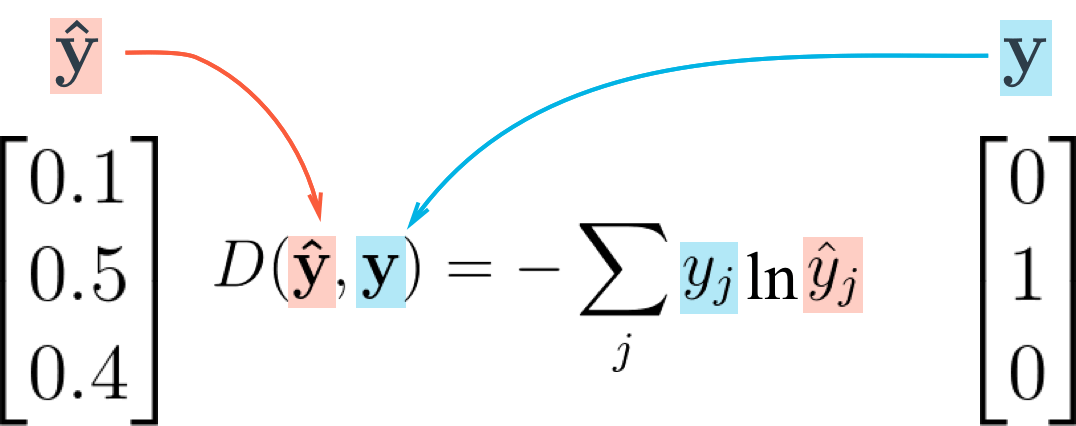

In [ ]:
from tqdm import tqdm
import torch
from IPython.display import clear_output
import numpy as np


def compute_loss(y_pred, y_true):
    return F.cross_entropy(y_pred, y_true)


def train_epoch(model, optimizer):
    loss_log, acc_log = [], []

    model.train()
    for x_batch, y_batch in tqdm(train_dataloader, leave=False, desc='Train epoch'):
        # move input tensors to gpu
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        # forget previous grads
        optimizer.zero_grad()
        # forward pass
        output = model(x_batch)
        # compute loss
        loss = compute_loss(output, y_batch)
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()

        # compute and log accuracy
        pred = torch.max(output, 1).indices
        acc = (pred == y_batch).sum() / y_batch.shape[0]
        acc = acc.cpu().item()
        acc_log.append(acc)

        # log loss
        loss = loss.cpu().item()
        loss_log.append(loss)
    return loss_log, acc_log


@torch.inference_mode()
def test(model):
    loss_log, acc_log = [], []

    model.eval()
    for x_batch, y_batch in tqdm(test_dataloader, leave=False, desc='Test'):
        # move input tensors to gpu
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        # infer model
        output = model(x_batch)

        # compute and log accuracy
        pred = torch.max(output, 1).indices
        acc = (pred == y_batch).sum() / y_batch.shape[0]
        acc = acc.cpu().item()
        acc_log.append(acc)

        # compute and log loss
        loss = compute_loss(output, y_batch)
        loss = loss.cpu().item()
        loss_log.append(loss)

    return loss_log, acc_log


def plot_history(train_history, test_history, epoch, title='loss'):
    plt.figure()

    plt.title('{} at {} epoch'.format(title, epoch + 1))
    plt.plot(train_history, label='train', zorder=1)

    points = torch.tensor(test_history)

    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='test', zorder=2)
    plt.xlabel('train steps')

    plt.legend(loc='best')
    plt.grid()

    plt.show()


def train_loop(model, opt, epochs=10):
    train_log, train_acc_log = [],[]
    test_log, test_acc_log = [],[]

    steps = len(train_dataset) / train_batchsize
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, opt)
        test_loss, test_acc = test(model)

        # store metrics
        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)

        test_log.append((steps * (epoch + 1), np.mean(test_loss)))
        test_acc_log.append((steps * (epoch + 1), np.mean(test_acc)))

        # plot all metrics (loss and acc for train/test)
        clear_output()
        plot_history(train_log, test_log, epoch)
        plot_history(train_acc_log, test_acc_log, epoch, title='accuracy')
        print(f'Last accuracy: {test_acc_log[-1][1]}')
    return test_acc_log[-1][1]

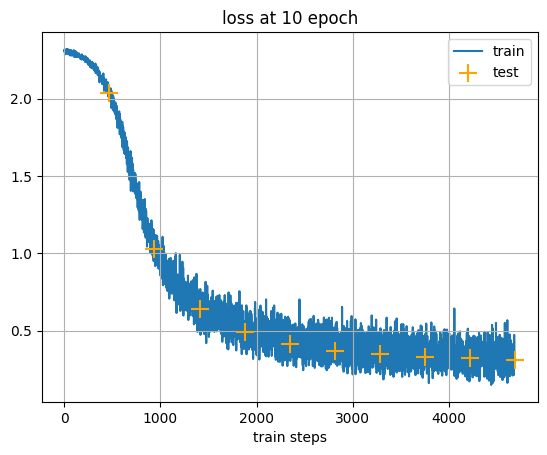

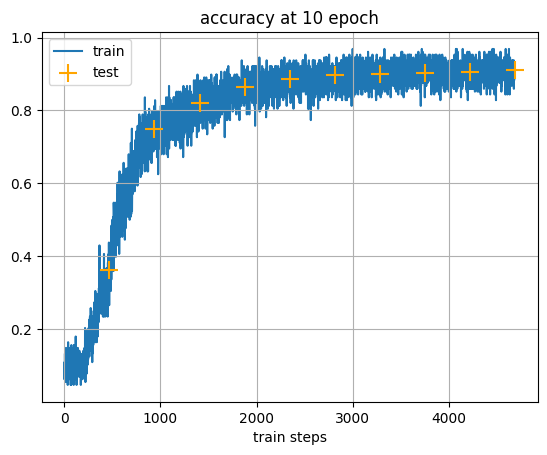

Last accuracy: 0.9101068037974683


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt)

## Initialization

Let's see default probability distribution for torch layers

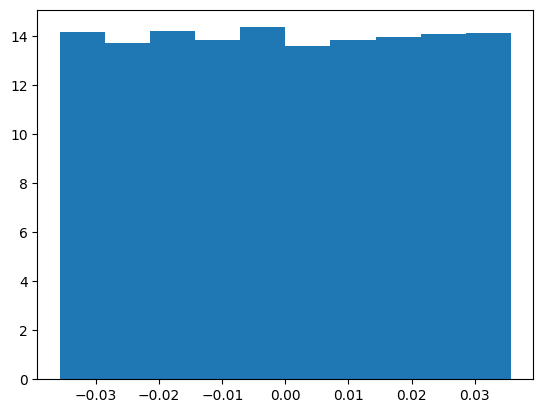

In [ ]:
default_init_tensor = Net().fc1.weight.data
plt.hist(default_init_tensor.reshape(-1), density=True)
plt.show()

Seems like Uniform...

According to [pytorch docs](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear):

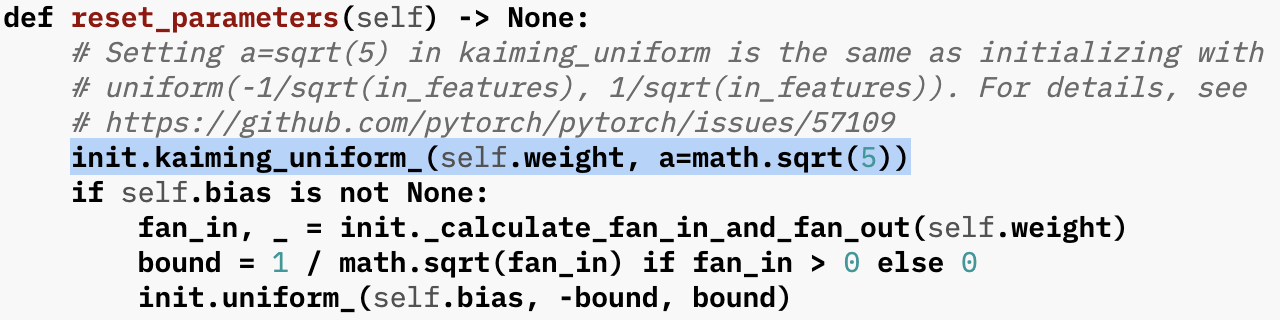

kaiming_uniform:

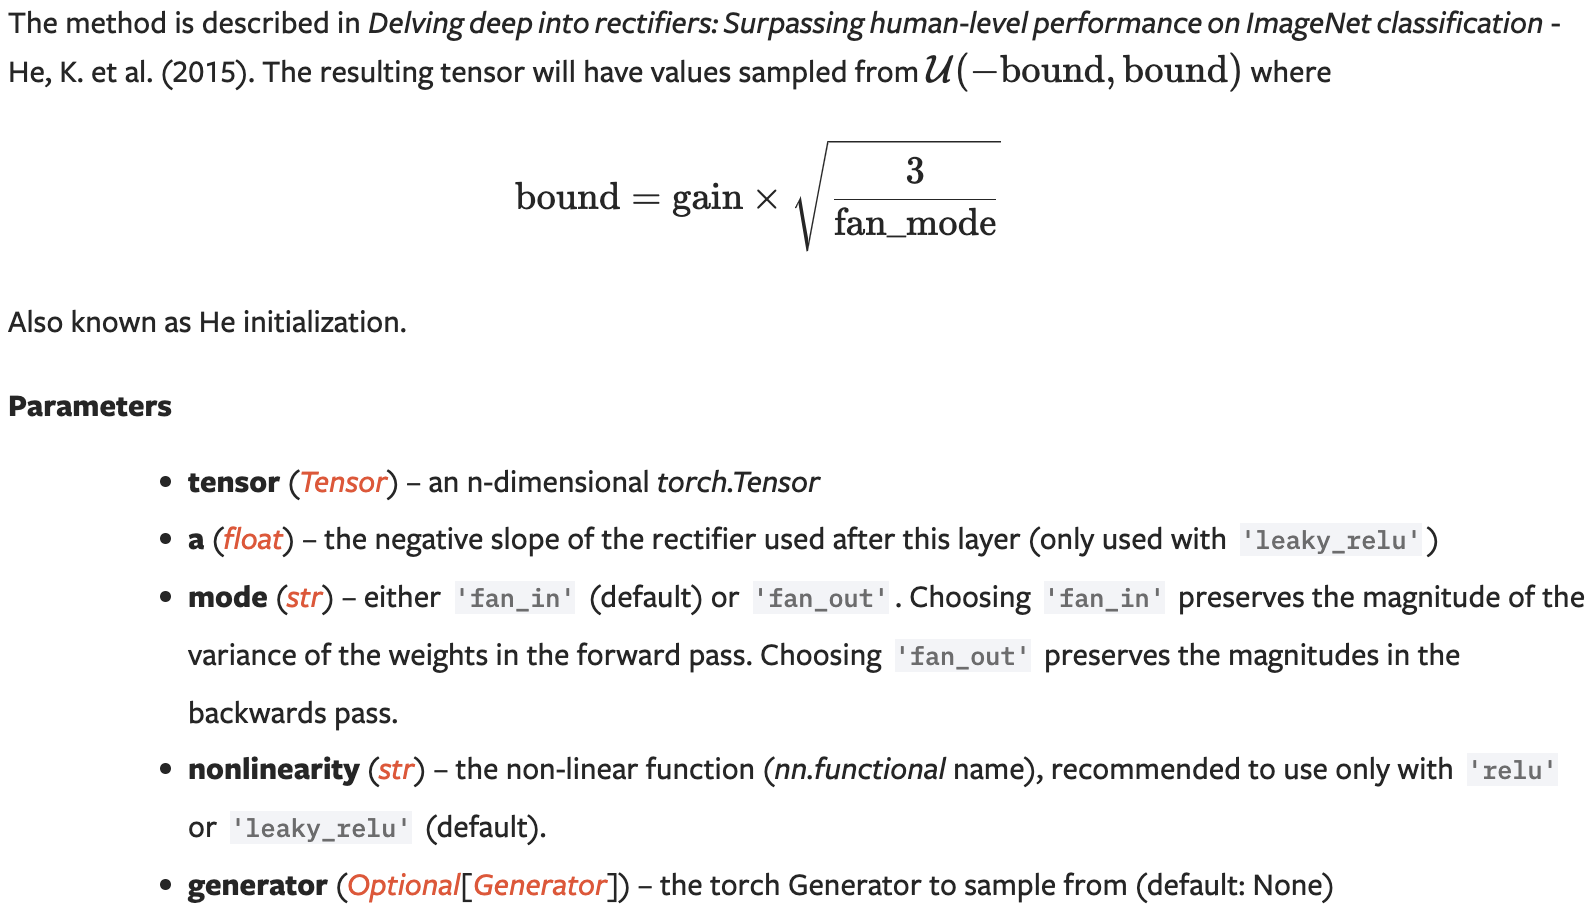

## Improving results

### Model

#### Better init

In [ ]:
class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(embedding_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)

        # init for relu activation
        torch.nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
        torch.nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        torch.nn.init.kaiming_uniform_(self.fc3.weight, nonlinearity='relu')

    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

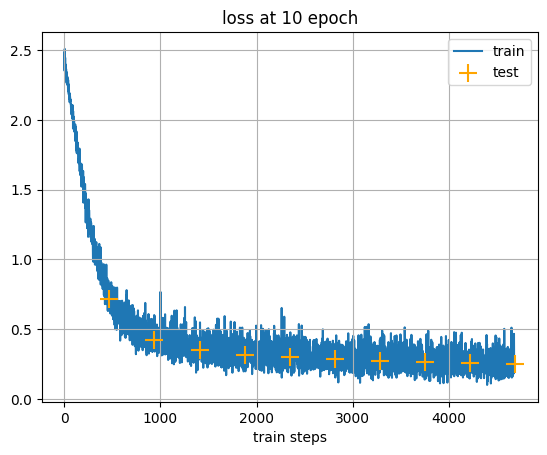

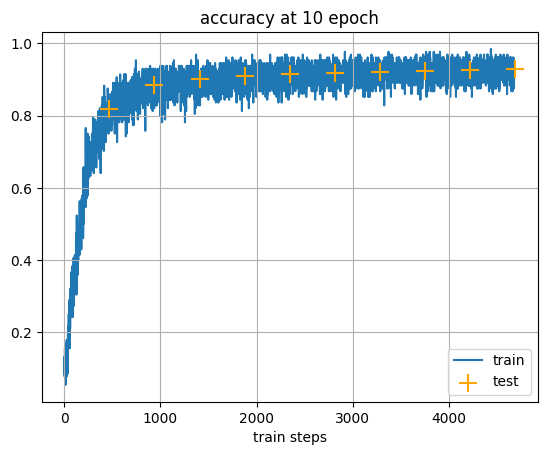

Last accuracy: 0.928995253164557


In [ ]:
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt)

To test other features in equal environment

In [ ]:
class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(embedding_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

#### Stack more layers :)

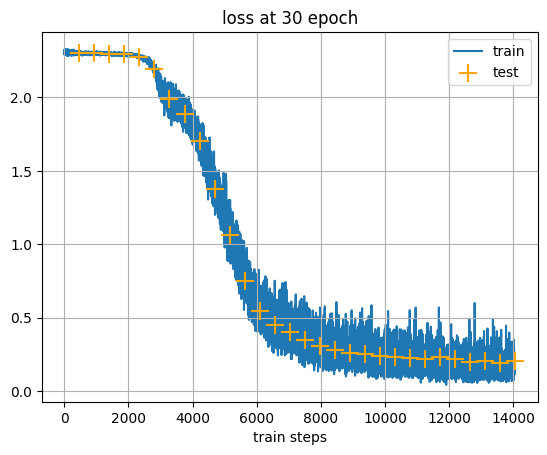

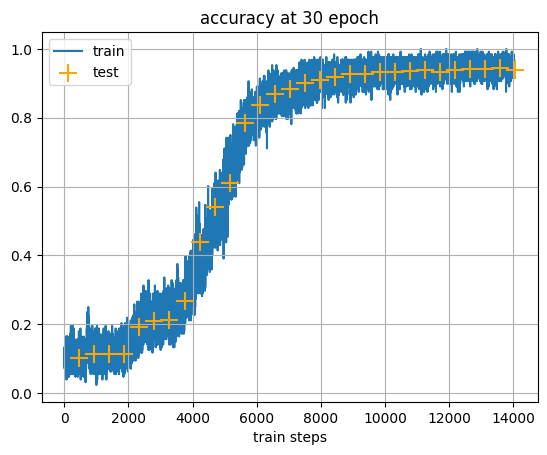

Max accuracy: 0.9393789556962026


In [ ]:
hidden_size = 40
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, epochs=30)

Data Science ;)

But know your limits

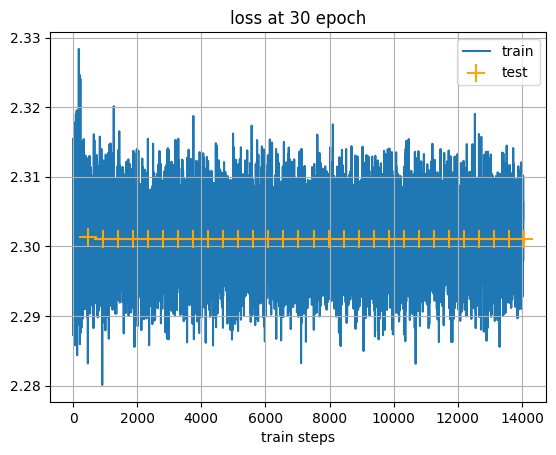

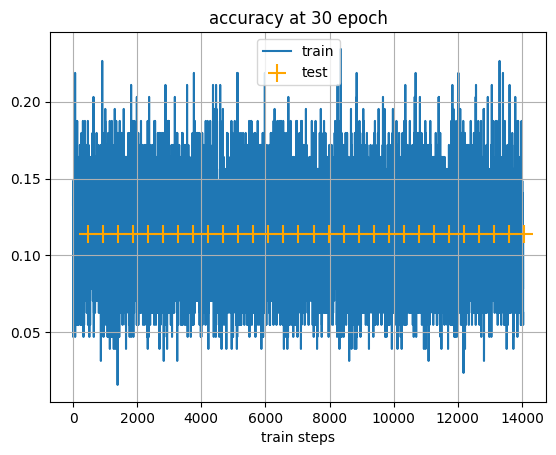

Max accuracy: 0.11362737341772151


In [ ]:
modules = [nn.Linear(embedding_size, hidden_size), nn.ReLU()]
for _ in range(20):
    modules.extend([nn.Linear(hidden_size, hidden_size), nn.ReLU()])
modules.append(nn.Linear(hidden_size, 10))
model = nn.Sequential(*modules)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, epochs=30)

$1 / 10 \approx 0.11$ --> random

Why is the network frozen?

#### Wider layers

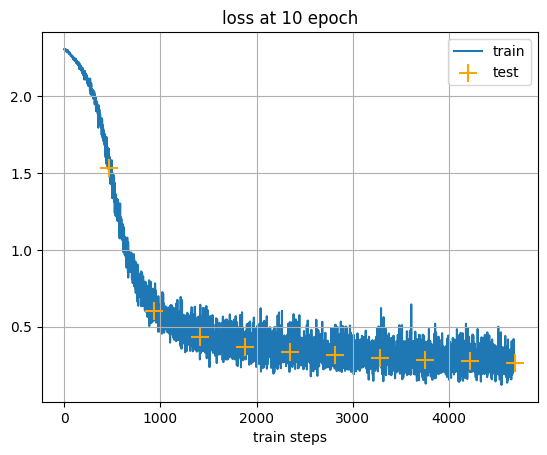

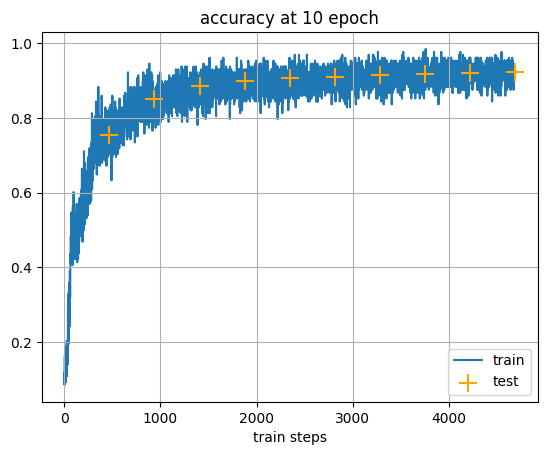

Max accuracy: 0.9227650316455697


In [ ]:
hidden_size = 512
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt)

#### DropOut

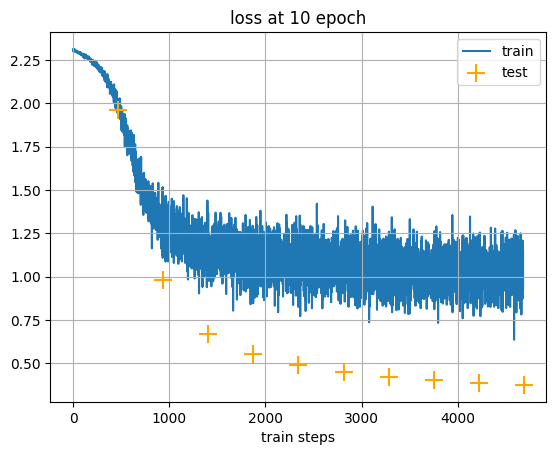

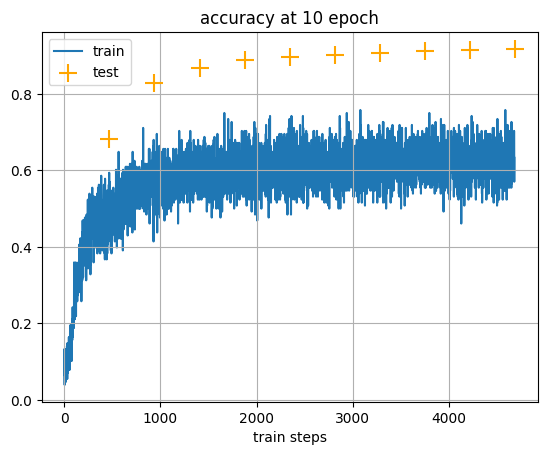

Max accuracy: 0.9174248417721519


In [ ]:
p = 0.2
hidden_size = int(40 / p)
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.Dropout1d(p=p),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.Dropout1d(p=p),
    nn.ReLU(),
    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt)

Usually hard to set up well

#### BatchNorm

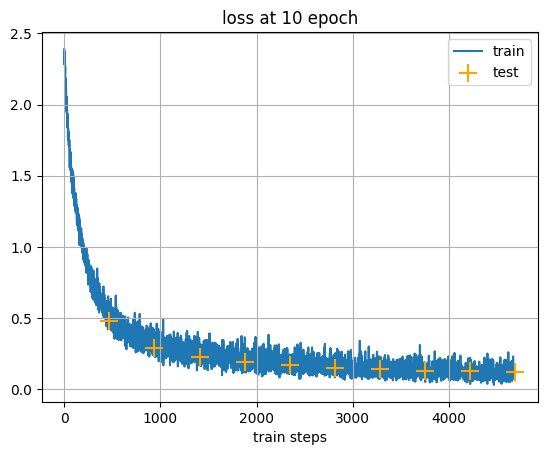

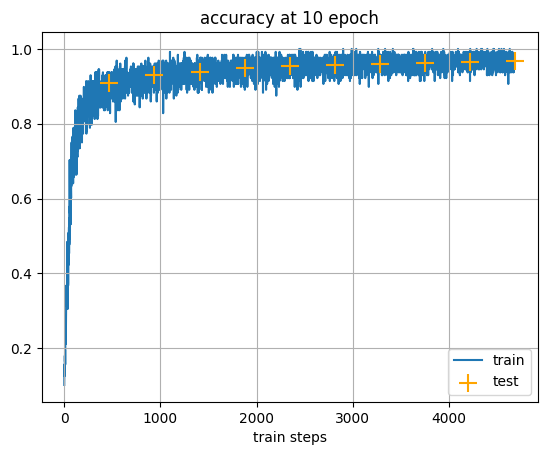

Max accuracy: 0.9664754746835443


In [ ]:
hidden_size = 40
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt)

Quite easy and powerful

But which sequence is the best?

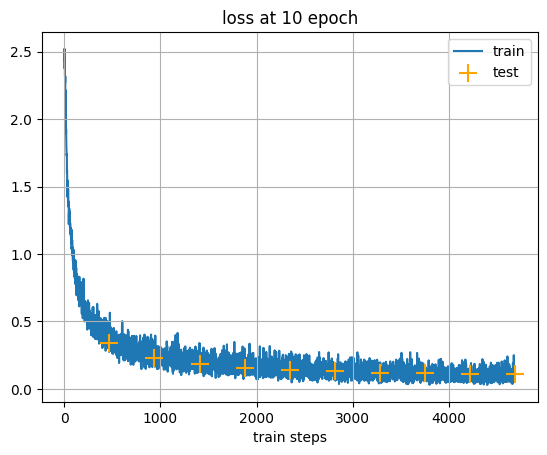

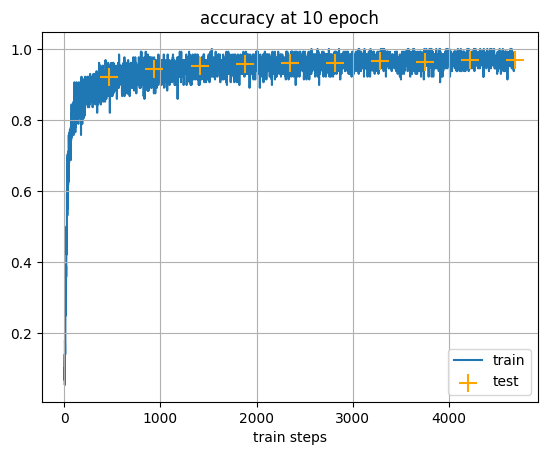

Last accuracy: 0.9675632911392406


In [ ]:
hidden_size = 40
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.ReLU(),
    nn.BatchNorm1d(hidden_size),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.BatchNorm1d(hidden_size),
    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt)

### Data

#### Augmentations

Instead of `torchvision.transforms` better use [`albumentations`](https://albumentations.ai/docs/getting_started/transforms_and_targets/) (faster + wider choice of transforms)

In [ ]:
train_transform = T.Compose([
    T.ToTensor(),
    T.RandomRotation(5),
    T.Lambda(lambda x: torch.flatten(x)),
])
test_transform = T.Compose([
    T.ToTensor(),
    T.Lambda(lambda x: torch.flatten(x)),
])

train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=train_transform)
test_dataset = datasets.MNIST(root='data', train=False, download=False, transform=test_transform)

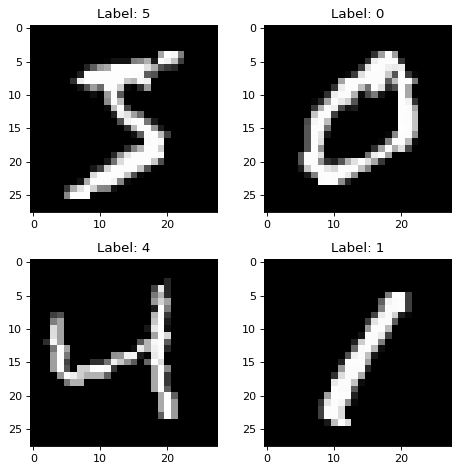

In [ ]:
fig = plt.figure(figsize=[6, 6], dpi=80)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % train_dataset[i][1])
    plt.imshow(train_dataset[i][0].numpy().reshape([28, 28]), cmap='gray');
fig.tight_layout()

In [ ]:
train_dataloader = DataLoader(
    train_dataset,
    batch_size=train_batchsize,
    shuffle=True,
    drop_last=True,
)
test_dataloader  = DataLoader(
    test_dataset,
    batch_size=test_batchsize,
    shuffle=False,
)

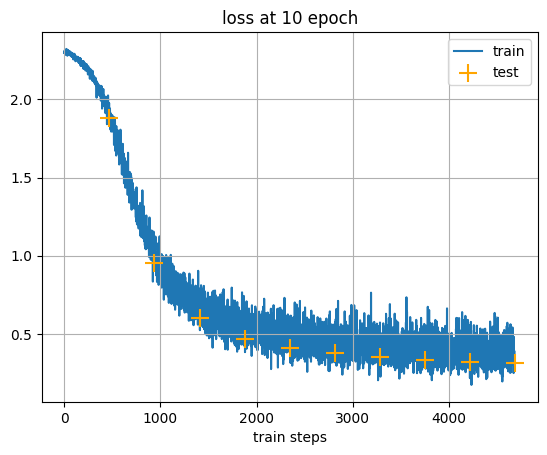

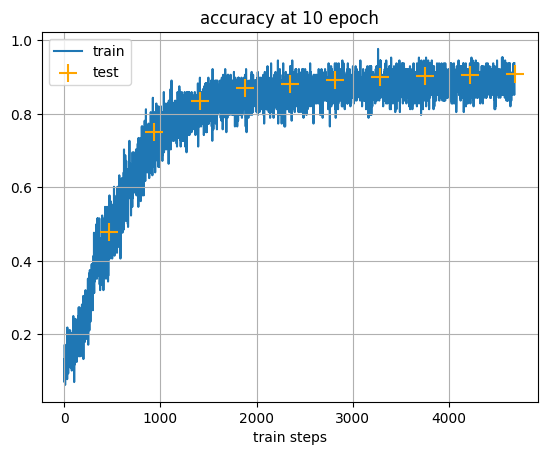

Last accuracy: 0.9080300632911392


In [ ]:
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt)

To test other features in equal environment

In [ ]:
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=test_transform)
test_dataset = datasets.MNIST(root='data', train=False, download=False, transform=test_transform)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=train_batchsize,
    shuffle=True,
    drop_last=True,
)
test_dataloader  = DataLoader(
    test_dataset,
    batch_size=test_batchsize,
    shuffle=False,
)

#### Syntetics

### Optimization

#### Optimizer

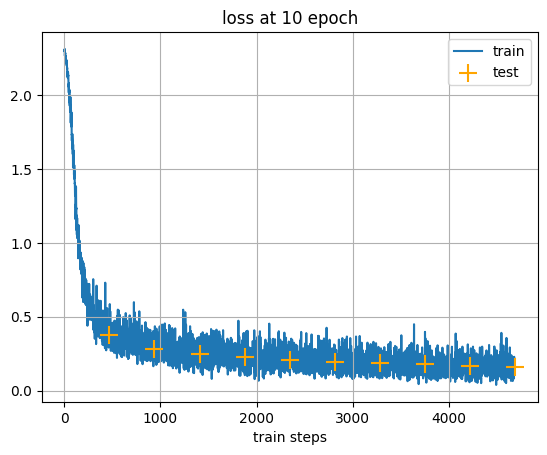

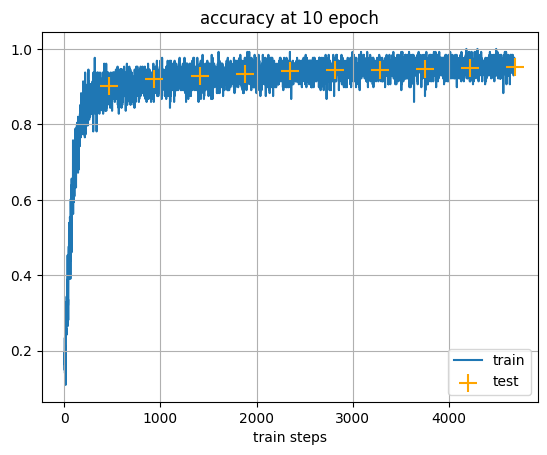

Last accuracy: 0.9528283227848101


In [ ]:
model = Net().to(device)
opt = torch.optim.Adam(model.parameters(), lr=3e-4)
last_accuracy = train_loop(model, opt)

#### Early stopping

In [ ]:
def train_loop(model, opt, epochs=100, early_stopping_epochs=3):
    train_log, train_acc_log = [],[]
    test_log, test_acc_log = [],[]

    steps = len(train_dataset) / train_batchsize
    best_metric_idx = 0
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, opt)
        test_loss, test_acc = test(model)

        # store metrics
        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)

        test_log.append((steps * (epoch + 1), np.mean(test_loss)))
        test_acc_log.append((steps * (epoch + 1), np.mean(test_acc)))

        # plot all metrics (loss and acc for train/test)
        clear_output()
        plot_history(train_log, test_log, epoch)
        plot_history(train_acc_log, test_acc_log, epoch, title='accuracy')
        print(f'Last accuracy: {test_acc_log[-1][1]}')

        # you can track any metric, important -- test
        if test_acc_log[epoch] > test_acc_log[best_metric_idx]:
            best_metric_idx = epoch
            # good practice here is to save model on disk

        if epoch - best_metric_idx >= early_stopping_epochs:
            break

    return test_acc_log[best_metric_idx][1]

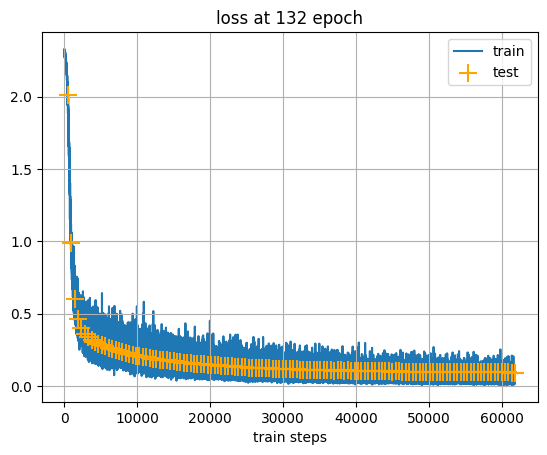

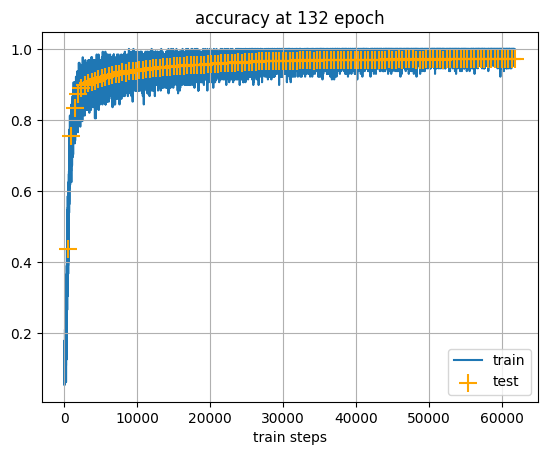

Last accuracy: 0.9716178797468354


Test:  30%|███       | 24/79 [00:00<00:00, 71.08it/s]

In [ ]:
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, epochs=500)

#### Scheduler

In [ ]:
def train_loop(model, opt, scheduler, epochs=100):
    train_log, train_acc_log = [],[]
    test_log, test_acc_log = [],[]

    steps = len(train_dataset) / train_batchsize
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, opt)
        test_loss, test_acc = test(model)

        # store metrics
        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)

        test_log.append((steps * (epoch + 1), np.mean(test_loss)))
        test_acc_log.append((steps * (epoch + 1), np.mean(test_acc)))

        # plot all metrics (loss and acc for train/test)
        clear_output()
        plot_history(train_log, test_log, epoch)
        plot_history(train_acc_log, test_acc_log, epoch, title='accuracy')
        print(f'Last accuracy: {test_acc_log[-1][1]}')

        scheduler.step(np.mean(test_loss))

    return test_acc_log[-1][1]

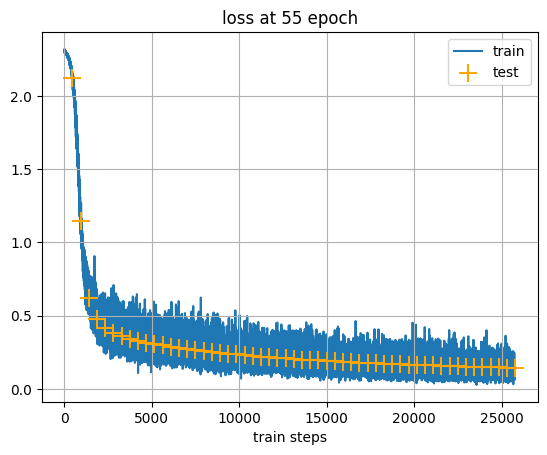

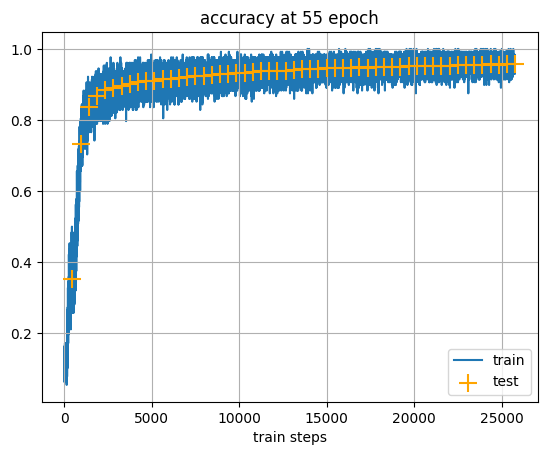

Last accuracy: 0.9572784810126582


KeyboardInterrupt: 

In [ ]:
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', threshold=1e-3, patience=3, verbose=True)
last_accuracy = train_loop(model, opt, scheduler)

To test other features in equal environment

In [ ]:
def train_loop(model, opt, epochs=10):
    train_log, train_acc_log = [],[]
    test_log, test_acc_log = [],[]

    steps = len(train_dataset) / train_batchsize
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, opt)
        test_loss, test_acc = test(model)

        # store metrics
        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)

        test_log.append((steps * (epoch + 1), np.mean(test_loss)))
        test_acc_log.append((steps * (epoch + 1), np.mean(test_acc)))

        # plot all metrics (loss and acc for train/test)
        clear_output()
        plot_history(train_log, test_log, epoch)
        plot_history(train_acc_log, test_acc_log, epoch, title='accuracy')
        print(f'Last accuracy: {test_acc_log[-1][1]}')
    return test_acc_log[-1][1]

### All together

In [ ]:
class Net(nn.Module):
    def __init__(self, hidden_size=512):
        super(Net, self).__init__()

        self.backbone = nn.Sequential(
            self.block_(embedding_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
        )
        self.classifier = nn.Linear(hidden_size, 10)

    def block_(self, features_in, features_out):
        # fully connected/feed-forward/linear
        fc = nn.Linear(features_in, features_out)
        # init for relu activation
        torch.nn.init.kaiming_uniform_(fc.weight, nonlinearity='relu')
        # batch norm
        bn = nn.BatchNorm1d(features_out)
        # activation
        relu = nn.ReLU()
        return nn.Sequential(fc, bn, relu)


    def forward(self, x):
        features = self.backbone(x)
        out = self.classifier(features)
        return out

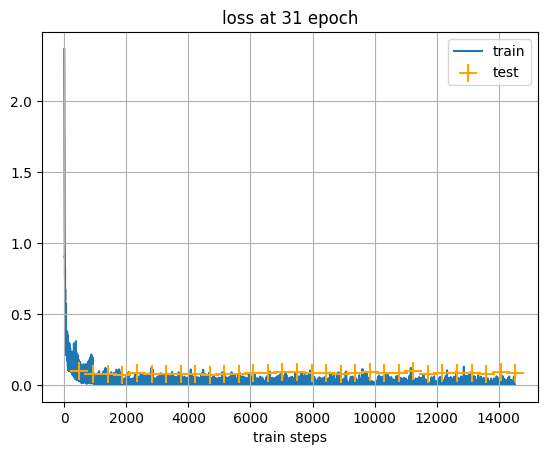

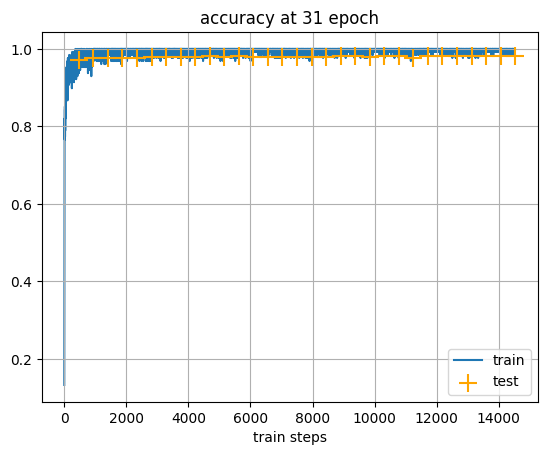

Last accuracy: 0.9822982594936709


KeyboardInterrupt: 

In [ ]:
model = Net().to(device)
opt = torch.optim.Adam(model.parameters(), lr=3e-4)
last_accuracy = train_loop(model, opt, epochs=50)

As you see, model overfits for train data and has "no space" to improve

So let's add DropOut for regularization, and lr scheduler for reducing high learning rate if model found nice local optimum

In [ ]:
class Net(nn.Module):
    def __init__(self, hidden_size=512):
        super(Net, self).__init__()

        self.backbone = nn.Sequential(
            self.block_(embedding_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            nn.Dropout1d(p=0.2),
        )
        self.classifier = nn.Linear(hidden_size, 10)

    def block_(self, features_in, features_out):
        # fully connected/feed-forward/linear
        fc = nn.Linear(features_in, features_out)
        # init for relu activation
        torch.nn.init.kaiming_uniform_(fc.weight, nonlinearity='relu')
        # batch norm
        bn = nn.BatchNorm1d(features_out)
        # activation
        relu = nn.ReLU()
        return nn.Sequential(fc, bn, relu)


    def forward(self, x):
        features = self.backbone(x)
        out = self.classifier(features)
        return out

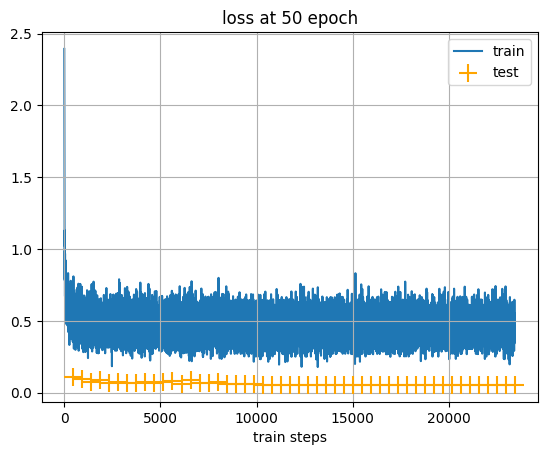

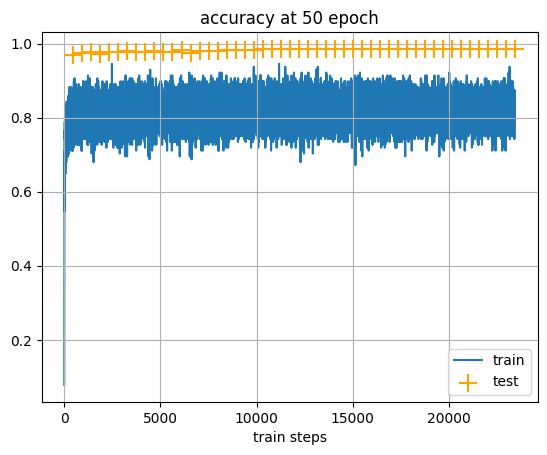

Last accuracy: 0.9852650316455697


In [ ]:
model = Net().to(device)
opt = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', threshold=1e-3, patience=3, verbose=True)
last_accuracy = train_loop(model, opt, scheduler, epochs=50)

But usually we use not just the last version, but the best

The best accuracy on this learning curve was $0.9856606012658228$ at $49$th epoch